# Assignment 2, part one 
# Blackbody radiation and determination of the Wien dissplacement Constant.
## Anna Rooney, 19333456, 3rd year Physics 2024
### [My github](https://github.com/arir2001/mitchison_lab2)
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)

### Part Two -- Homework Tasks

**(Q1) Generalise the function in exercise 1 to allow for an arbitrary number of objects, without any assumptions about their relative masses.** 
 
[Go to (1) Results](#section1)

**(Q2) For the three body system of the sun, mars and earth:**
Plot the following over a suitable time range:   
- a) the trajectories of all three bodies in the centre of mass frame.     
- b) the trajectory of the sun only, and explain the observed behaviour *(you may either write a comment in your Python code or write in a separate markdown cell)*.   
- c) the separation between Earth and Mars as a function of time.

[Go to (2) Results](#section2)

[Go to (2a) Results](#section2a)

[Go to (2b) Results](#section2b)

[Go to (2b) Plots](#section2bplots)

[Go to (2c) Results](#section2c)


The gravitational force felt by an object (planet, satellite, star, etc.) of mass $m_1$ at position $\mathbf{r}_1$  due to another of mass $m_2$ at $\mathbf{r}_2$ is given by

$$\mathbf{F} = - \frac{G m_1 m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (\mathbf{r}_1-\mathbf{r}_2)$$

The equations of motion for the first object can then be written:

$$ \frac{\mathrm{d}^2 x_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (x_1-x_2) $$
$$ \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (y_1-y_2) $$

In what follows, we will express time in years, distances in AU (astronomical unit $\sim$ Earth-Sun distance), masses in terms of the solar mass ($M_\odot$) and use $G \approx 4 \pi^2$ to simplify calculations.

Revisit the slides and Python script from Lecture 4 (Scipy2.py and Scipy slides 2) -- here we examined how a 2nd order differential equation (the harmonic oscillator) could be solved using scipy.integration.solve_ivp by splitting it into two coupled first order equations. Use this as a basis to solve the differential equations above.

Note that gravitational forces are always proportional to the mass $m$ upon which they act. It is therefore more convenient to work with the velocity $\mathbf{v} = \dot{\mathbf{r}}$ instead of the momentum $\mathbf{p} = m\mathbf{v}$, so that redundant factors of $m$ cancel from the equations of motion.

### Exercise 1
For the first case, we look at the case of the earth and the sun. We choose coordinates so that all motion takes place within the $x-y$ plane ($z=0$).

Take $m_1 = 3\times10^{-6}$ and $m_2 =1.0$.

Further assume that the sun remains fixed at the origin -- i.e. $\mathbf{r_2}(t) = \mathbf{0}$.

Use initial conditions $\mathbf{r}_1(t=0) = (1,0)$ and $\mathbf{v}_1(t=0) = (0, 2\pi)$.


a) Write the system of 4 coupled differential equations describing the system.

b) Write a function evaluating each of the first derivative terms, and which can be passed to solve_ivp to integrate this system of ODEs.

c) Calculate the orbit trajectory by integrating the system of ODEs over a suitable sample of time points.

d) Plot and compare a few orbit with different initial velocities



_answer to a)_

$$ \frac{\mathrm{d} x_1}{\mathrm{d} t} (t)= v_{x1} $$

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} (t) = v_{y1} $$

$$ \frac{\mathrm{d} v_{x1}}{\mathrm{d} t} (t) = -\frac{G m_2 x_1}{(x_1^2 + y_1^2)^{3/2}}  $$

$$ \frac{\mathrm{d} v_{y1}}{\mathrm{d} t} (t) = -\frac{G m_2 y_1}{(x_1^2 + y_1^2)^{3/2}} $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

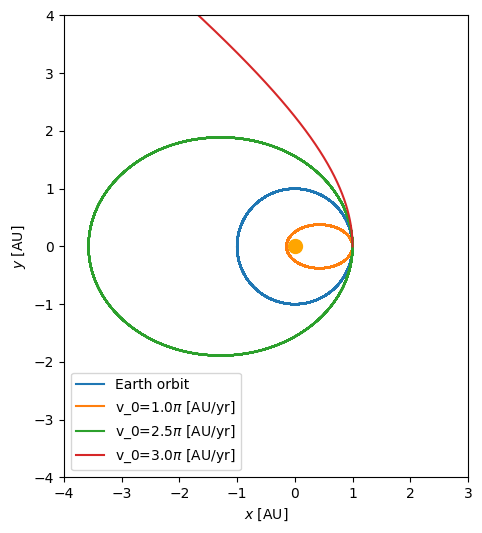

In [3]:
# y contains (x1, y1, px1, py1)
# (position of m1, positin of y2, x-momentum, y-momentum)
# this calculates the derivatives of the system’s state at each point in time

# y contains (x1, y1, px1, py1)
def dydt(t, y, m2):
    # Define an output array with same dimensions as y
    output = np.zeros_like(y)   #an array that contains the current state of the system.
    # Define derivatives
    output[0] = y[2]        # The time derivative of x-position is the x-velocity (so this directly assigns the x velocity to the derivative of position).
    output[1] = y[3]        # also the time derivative of y-position is the y-velocity.
    output[2] = -4*np.pi**2*m2*y[0]/(y[0]**2+y[1]**2)**(3/2)        #acceleration components based on gravitational force
    output[3] = -4*np.pi**2*m2*y[1]/(y[0]**2+y[1]**2)**(3/2)        #acceleration is given by Newton’s law of gravitation, F inversely proportional to the square of the distance between the two bodies
        #soo y[0] becomes y[2], y[1] becoomes y[3], and y[2 , 3] becomes the newtoon's laaw . 
    return output  
    #OUTPUT is [dx/dt, dy/dt, d(px)/dt, d(py)/dt].
     

#initial conditions
y0 = np.array([1.0, 0.0, 0*2*np.pi, 2*np.pi])
m1, m2 = 3E-6, 1.0

#range of times
t_min, t_max = 0.0, 50.0
t = np.linspace(t_min, t_max, 5000)

#This numerically integrates the equations from dydt over time.
# Run ODE solver for earth-like initial conditions. Set tolerances to be small enough to avoid numerical errors
earthdata = solve_ivp(lambda t,y: dydt(t, y, m2), (t_min, t_max), y0, rtol=1E-10, atol=1E-10)   

#other possible starting values of vx
otherstarting = [1.0, 2.5, 3.0]
otherdata = []                     #create an empty list

#generate data for the other cases also
for const in otherstarting:
    y0a = np.array([1, 0, 0*np.pi, const*np.pi]) 
    temp = solve_ivp(lambda t,y: dydt(t, y, m2), (t_min, t_max), y0a, rtol=1E-10, atol=1E-10)
    otherdata.append(temp)         

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata.y[0], earthdata.y[1], label="Earth orbit")

for i, const in enumerate(otherstarting):
    ax.plot(otherdata[i].y[0], otherdata[i].y[1] , label='v_0='+str(const)+r'$\pi$ [AU/yr]')
ax.set_xlim([-4.0,3.0])
ax.set_ylim([-4.0,4.0])
ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
ax.legend()
plt.show()

## Homework assignment

### Q1. 
Generalise the function above to allow for an arbitrary number of objects, without any assumptions about their relative masses.   
Assume the objects are all in-plane -- only x and y components vary.

To produce nice orbital plots for the systems below, work in the centre-of-mass frame.   
_i.e. correct the initial positions and velocities so that the centre-of-mass remains at the origin_

Create a function to do this for any set of initial positions and velocities.

---

## Answer: 
- function 'dydt_gen'
- This 

<a id="section1"> Question 1 result </a>

In [4]:
# Integrates ODE for any number of objects

# Hint use num = number of objects
# Organise y as a 4*num element array arranged (x1, x2, ... y1, y2, .... vx1, vx2,....., vy1, vy2,....)
# organise output similarly
# mass is now a vector with num elements

def dydt_gen_2(t, y, mass, num):
    output = np.zeros_like(y)   # y is a vector 4*num 
    G = 4 * np.pi**2  # Gravitational constant AU to simplify the sum
    #acceleration components based on gravitational force
    #acceleration is given by Newton’s law of gravitation, F inversely proportional to the square of the distance between the two bodies
    # loop through each unique pair of bodies only once, then in another loop check how the gravity of the other bodies affect it 
    for n in range(num):
        i = n  # x-position
        j = num + n  #  y-position
        k = 2 * num + n  # x-velocity
        l = 3 * num + n  #  y-velocity

        # set position derivatives to velocities, as in the above
        output[i] = y[k]  # dx/dt = vx
        output[j] = y[l]  # dy/dt = vy  # also the time derivative of y-position is the y-velocity.

        # initialize net acceleration for object 'n', 'j' due to the forces from other bodies
        ax = 0.0
        ay = 0.0

        # Re caclulate the forces from all other bodies
        for m in range(num):
            if m != n:  # skip self
                xm = y[m]  # x-position of object m
                ym = y[num + m]  # y-position of object m

                # calculates distance components and distance between objects m, j, i, where r is distance equation
                dx = y[i] - xm
                dy = y[j] - ym
                r = np.sqrt(dx**2 + dy**2)

                if r != 0:
                    # Force components between object n and object m
                    force = G / r**3
                    ax -= force * mass[m] * dx
                    ay -= force * mass[m] * dy

        # calculated accelerations are now the outputs, F = ma, it will then 
        output[k] = ax
        output[l] = ay

    return output

#corrects initial conditions so that centre-of-mass is fixed and at the origin
#https://en.wikipedia.org/wiki/Center_of_mass#A_system_of_particles 
def correct_for_cm(x0s, y0s, vx0, vy0, mass):
    
    num = len(x0s)
    x0s = np.array(x0s)
    y0s = np.array(y0s)
    vx0 = np.array(vx0)
    vy0 = np.array(vy0)
    mass = np.array(mass)
    
    M_tot = np.sum(mass)
    
    cmx = np.sum(mass * x0s) / M_tot    #sum up all the masses, times the locations, and divide by the total masses. 
    cmy = np.sum(mass * y0s) / M_tot
    cm_vx = np.sum(mass * vx0) / M_tot
    cm_vy = np.sum(mass * vy0) / M_tot

    x0s = x0s - cmx
    y0s = y0s - cmy
    vx0 = vx0 - cm_vx
    vy0 = vy0 - cm_vy
    
    return x0s, y0s, vx0, vy0

### Q2. 
Consider a three-body system consisting of the Sun, Earth and Mars. 

You can assume that Mars has mass $3.2\times10^{-7} M_\odot$ and a circular orbit with a radius of $1.53$ AU. A circular orbit of radius $r$ around the sun implies an orbital speed of
$$ |\mathbf{v}| = \sqrt{\frac{GM_{\odot}}{r}}.$$  
You can also assume that Earth and Mars are aligned along the positive x-axis at $t=0$.

Plot the following over a suitable time range:   
- a) the trajectories of all three bodies in the centre of mass frame.     
- b) the trajectory of the sun only, and explain the observed behaviour *(you may either write a comment in your Python code or write in a separate markdown cell)*.   
- c) the separation between Earth and Mars as a function of time.

---
The code plots question 2 b, c first, and 2 a last. 

To jump to the code: 


<a id="section2"> Question 2 </a>

[Go to (2a) Results](#section2a)

[Go to (2b) Results](#section2b)

[Go to (2b) Plots](#section2bplots)

[Go to (2c) Results](#section2c)

---

## Note:
### Note that the units are done in $$pi$$ which is easier for AU : 

Using AU ie solar masses and years as our units, the gravitational constant G becomes:
$$
G \approx 4\pi^2 \, \text{AU}^3 / (\text{solar mass} \cdot \text{year}^2)
$$

This value comes from Kepler's third law, is convenient for working in astronomical units.

## Part a, c: the trajectories of all three bodies in the centre of mass frame, and the separation between Earth and Mars as a function of time.

In the trajectories, which take place over a range of 500 years with 5000 time points, we see that as time progresses, Earth and mars seperate from each other. 

[Go to (2a) Results](#section2a)

The rate of these seperations and the degree to which they seperate can be seen in the first chart created, for part c-- 

The seperation increase if the difference in the offsets (the velocity factor) is larger. 

The green line, which increases the seperation the most for the given rate of time, is due to earth offset = 2.5, mars offset = 1.4. 

The difference here is 0.9 which is the largest out of all the offset differences. 

[Go to (2c) Results](#section2c)

Question 2 c, seperations of mars and earth in sun frame of reference


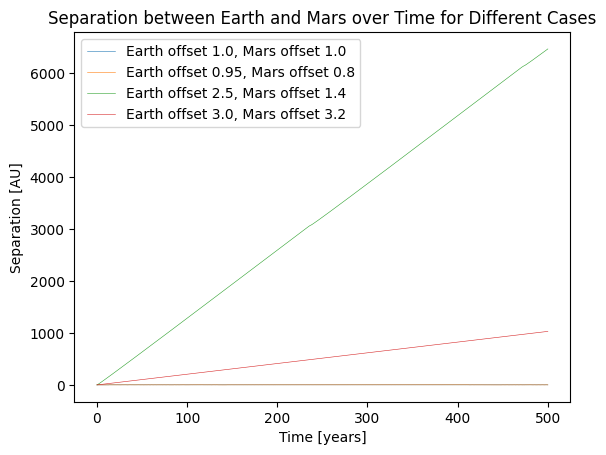

In [5]:
print('Question 2 c, seperations of mars and earth in sun frame of reference')

#other possible starting values of vx
otherstarting = [1.0, 0.95, 2.5, 3.0]
otherstarting2 = [1.0, 0.8, 1.4, 3.2]

otherdata = []                     #create an empty list

num = 3
mass = [3E-6, 3.2E-7, 1.0]  #earth, mars, solar masses
x0s = [1, 1.53, 0]          #earth, mars, solar radiuses in AU
y0s = [0, 0, 0]
vx0 = [0, 0, 0]

t_min, t_max = 0.0, 500.0  # Simulate for 50 years
t = np.linspace(t_min, t_max, 5000)  # Use 5000 time points for a smooth plot

#generate data for the other cases also -- using vy0, multiply the force by random constants. 
#We start with multiplying it by 1, which returns a normal sphere. 
#same time frame as the previous times
for c in range(len(otherstarting)):
    co = otherstarting[c]
    co2 = otherstarting2[c]
    
    vy0 = [2*np.pi/np.sqrt(1)*co , 2*np.pi/np.sqrt(1.53)*co2, 0] #sun is 0 as in origin frame.
    
    x0c, y0c, vx0c, vy0c = correct_for_cm(x0s, y0s, vx0, vy0, mass)
    input1 = np.concatenate((x0c, y0c, vx0c, vy0c))

    three_body = solve_ivp(lambda t, y: dydt_gen_2(t, y, mass, num), (t_min, t_max), input1, rtol=1E-6, atol=1E-6)
    
    earth_x = three_body.y[0, :]
    earth_y = three_body.y[3, :]

    mars_x = three_body.y[1, :]
    mars_y = three_body.y[4, :]

    sun_x = three_body.y[2, :]
    sun_y = three_body.y[5, :]
    
    otherdata.append([earth_x, earth_y, mars_x, mars_y, sun_x, sun_y])
    
    #pplotting the separation between Earth and Mars
    separation = np.sqrt((mars_x - earth_x)**2 + (mars_y - earth_y)**2)
    
    plt.plot(three_body.t, separation, label=f'Earth offset {co}, Mars offset {co2}', linewidth = 0.4)

plt.xlabel('Time [years]')
plt.ylabel('Separation [AU]')
plt.title('Separation between Earth and Mars over Time for Different Cases')
plt.legend()
plt.show()



<a id="section2c"> Question 2c result </a>

Question 2 a, trajectories in sun frame of reference


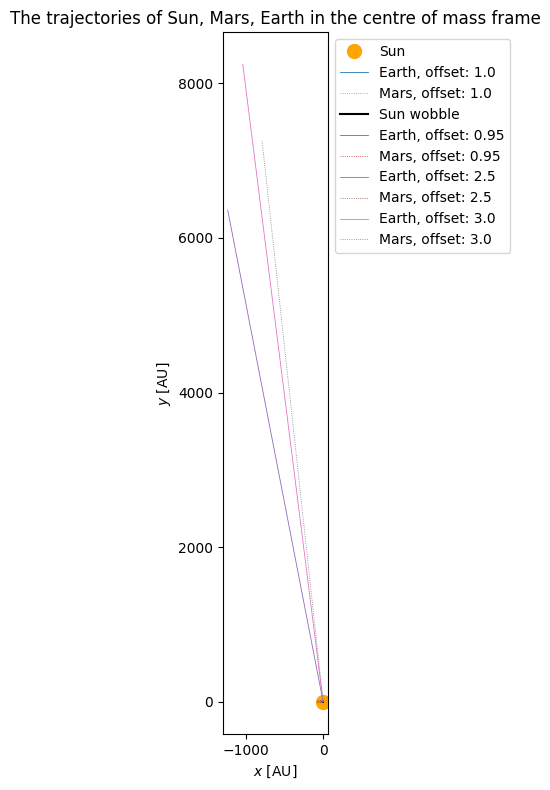

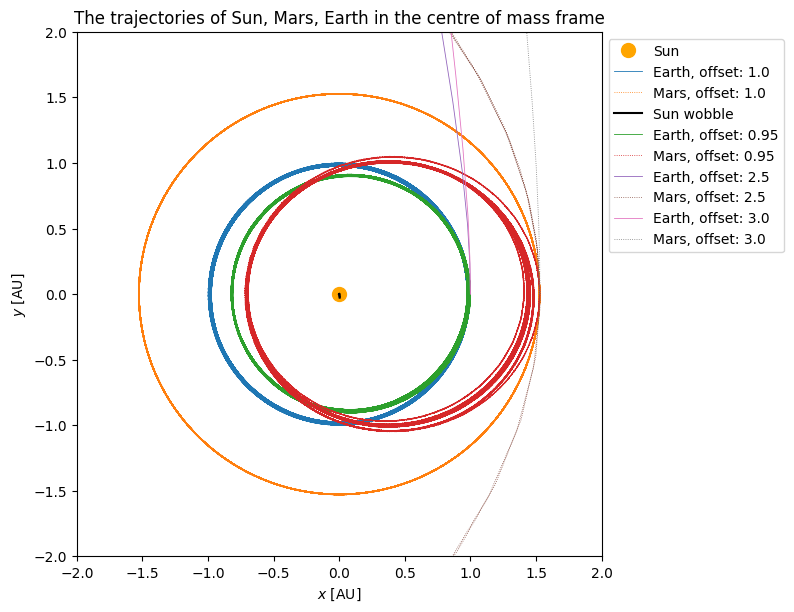

In [6]:

print('Question 2 a, trajectories in sun frame of reference')
#now the circulation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange', label='Sun')  # Plot the Sun at the origin

# looping  through each set of data in the list from the 'c' loop, and plot the orbits
for idx, data in enumerate(otherdata):
    earth_x, earth_y, mars_x, mars_y, sun_x, sun_y = data
    ax.plot(earth_x, earth_y, label=f'Earth, offset: {otherstarting[idx]}', linewidth = 0.6)
    ax.plot(mars_x, mars_y, label=f'Mars, offset: {otherstarting[idx]}', linestyle=':', linewidth = 0.6)
    label_if_first = lambda lbl: lbl if idx == 0 else None
    ax.plot(sun_x, sun_y, label=label_if_first('Sun wobble'), color = 'black')


ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')

plt.title('The trajectories of Sun, Mars, Earth in the centre of mass frame')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

plt.tight_layout()
plt.show()

#now the same with different axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange', label='Sun')  # Plot the Sun at the origin

# looping  through each set of data in the list from the 'c' loop, and plot the orbits
for idx, data in enumerate(otherdata):
    earth_x, earth_y, mars_x, mars_y, sun_x, sun_y = data
    ax.plot(earth_x, earth_y, label=f'Earth, offset: {otherstarting[idx]}', linewidth = 0.6)
    ax.plot(mars_x, mars_y, label=f'Mars, offset: {otherstarting[idx]}', linestyle=':', linewidth = 0.6)
    label_if_first = lambda lbl: lbl if idx == 0 else None
    ax.plot(sun_x, sun_y, label=label_if_first('Sun wobble'), color = 'black')

ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')

plt.title('The trajectories of Sun, Mars, Earth in the centre of mass frame')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

plt.tight_layout()
plt.show()



<a id="section2a"> Question 2a result </a>

## Part b: the trajectory of the sun only, and explain the observed behaviour *(you may either write a comment in your Python code or write in a separate markdown cell)*. 

Here, Only the sun trajectory is plotted. It is very small compared to the trajectories of the earth and mars, and is really just a wobble.

In a seperate plot, the trajectory of the sun is scaled alongside the trajectories of mars and earth so we can make better sense of it in conjunction with the other trajectories.

This 'wobble' occours because the mars trajectory shits to the right and downwards ever so slightly. 

This pulls the sun to the right and downward too. 

It is scaled larger in the second plots, and we see this shift far more dramatically. Please note this is NOT the actual trajectory of the sun, it is scaled appropriately to see the shift. 

<a id="section2b"> Question 2b </a>

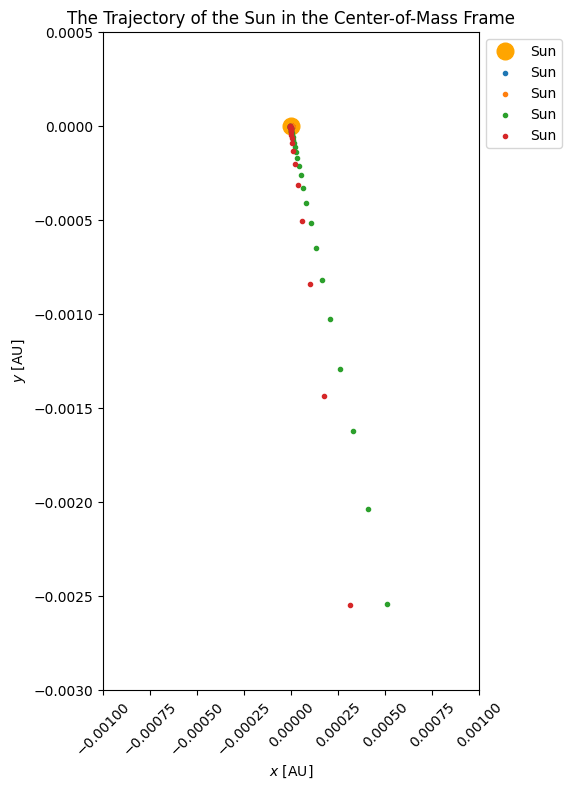

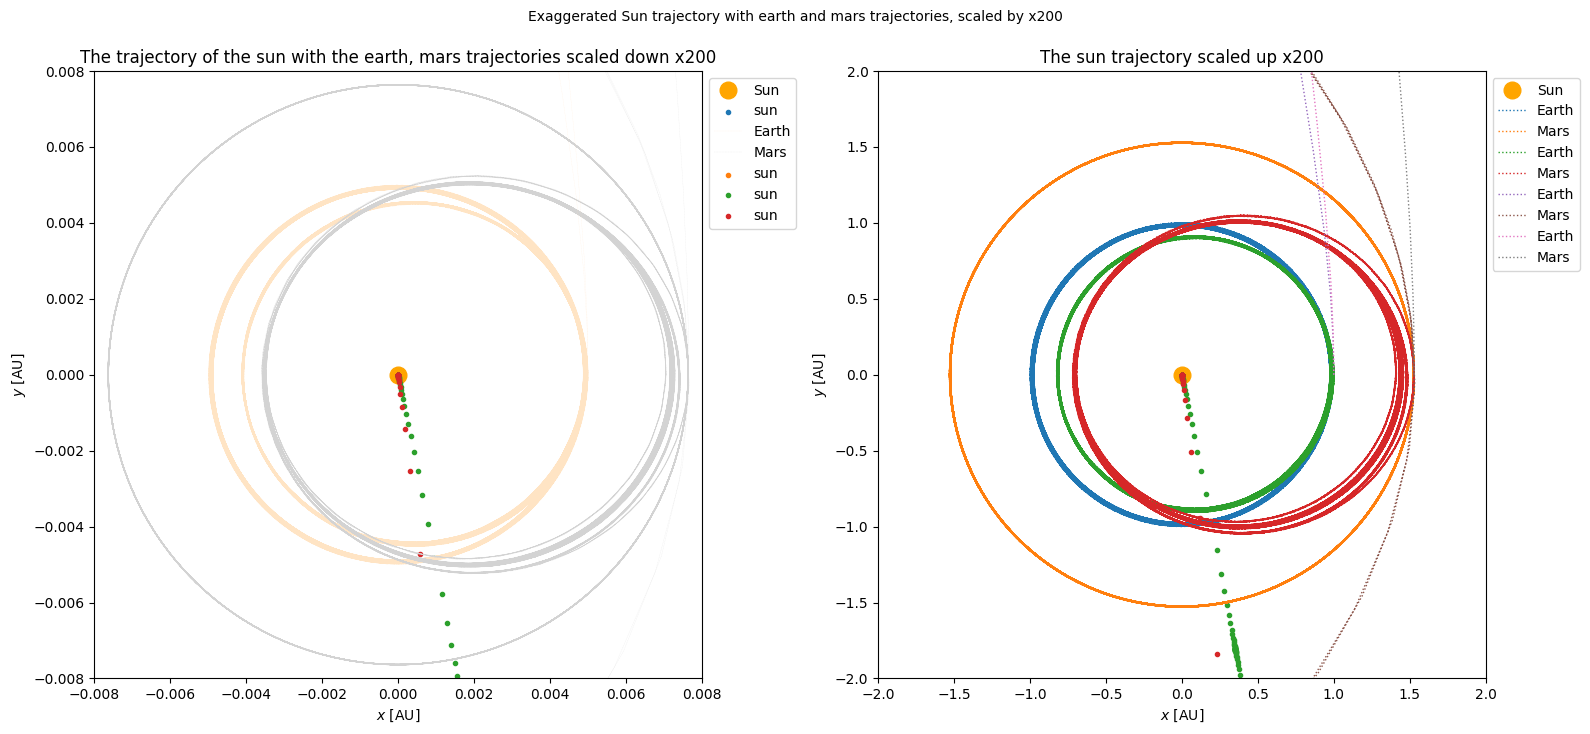

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')  # plot the Sun at the origin

divis = 200

#using the sun data from the same loop 
for idx, data in enumerate(otherdata):
    earth_x, earth_y, mars_x, mars_y, sun_x, sun_y = data
    ax.scatter(sun_x, sun_y, label='Sun', s=9)  # Plot Sun's trajectory as a continuous line

ax.set_xlim([-0.001, 0.001])
ax.set_ylim([-0.003, 0.0005])

ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
plt.title('The Trajectory of the Sun in the Center-of-Mass Frame')

ax.tick_params(axis='x', labelrotation=45)  

ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()  # Adjusts the plot layout
plt.show()


""" Now we plot with the mars and earth data in the background -- by dividing by divisor, we can scale them together to explain the data."""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Create two side-by-side plots in the same figure
fig.suptitle(f'Exaggerated Sun trajectory with earth and mars trajectories, scaled by x{divis}', fontsize=10, y=0.95)

#first plot, scaled
ax1.set_aspect('equal')
ax1.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')
for idx, data in enumerate(otherdata):
    earth_x, earth_y, mars_x, mars_y, sun_x, sun_y = data
    ax1.scatter(sun_x, sun_y, s=9, label = 'sun' )
    label_if_first = lambda lbl: lbl if idx == 0 else None
    ax1.plot(earth_x/divis, earth_y/divis, label=label_if_first('Earth'), color='bisque', linestyle=':', linewidth=0.2)
    ax1.plot(mars_x/divis, mars_y/divis, label=label_if_first('Mars'), color='lightgrey', linestyle=':', linewidth=0.2)
ax1.set_xlim([-0.008, 0.008])
ax1.set_ylim([-0.008, 0.008])
ax1.set_xlabel('$x$ [AU]')
ax1.set_ylabel('$y$ [AU]')
ax1.set_title(f'The trajectory of the sun with the earth, mars trajectories scaled down x{divis}')

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Second plot not scaled
ax2.set_aspect('equal')
ax2.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')  
for idx, data in enumerate(otherdata):
    earth_x, earth_y, mars_x, mars_y, sun_x, sun_y = data
    ax2.scatter(sun_x*divis, sun_y*divis, s=9)
    ax2.plot(earth_x, earth_y, label=('Earth'), linestyle=':', linewidth=1)
    ax2.plot(mars_x, mars_y, label='Mars', linestyle=':', linewidth=1)
ax2.set_xlim([-2.0, 2.0])
ax2.set_ylim([-2.0, 2.0])

ax2.set_xlabel('$x$ [AU]')
ax2.set_ylabel('$y$ [AU]')
ax2.set_title(f'The sun trajectory scaled up x{divis}')

ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


<a id="section2bplots"> Question 2b plots </a>

### Q3.
<a id="section3"> Question 3  </a>

_Horseshoe orbits_ can occur when a smaller body (such as an asteroid) and a large object (such as Earth) are in similar orbits around a star.  
The asteroid's trajectory around the sun is affected by the gravitational pull of Earth when the two bodies are nearest in their orbits.  
If the asteroid is on a lower, faster orbit than Earth, then the resulting force towards Earth shifts the asteroid to a higher, slower orbit, and vice versa.  
A horseshoe orbit occurs when this shifts the asteroid from a lower to a higher orbit than Earth, so that it goes through a cycle of catching up and then falling behind the Earth.  
The change in the shape of the asteroid's orbit are very small, but result in a horseshoe shape when mapped relative to both the Sun and Earth.  

To model this:   
- replace Mars with a body MUCH less massive than Earth, with an initial position directly opposite Earth.  
- choose initial conditions so that this object is on a circular orbit with the same angular direction as Earth, but with a slightly smaller or greater radius.  
- plot trajectories in a reference frame which rotates _with_ Earth so that a horseshoe-shaped orbit is clear

_Hint: Correct for the centre-of-mass as before, and then transform the coordinates so that the angle from the Sun to Earth is fixed.    
You can do this by finding the position of Earth in polar coordinates ($r, \theta$) at each time step, and then rotating by $-\theta$ using:_

$$x_{\rm new} = x_{\rm old}  \cos(-\theta) - y_{\rm old}  \sin (-\theta)$$
$$y_{\rm new} = x_{\rm old}  \sin(-\theta) +y_{\rm old}  \cos (-\theta)$$

In [ ]:
# Initial conditions for Q3: Sun, Earth, Asteroid

print('Question 3, asteroid')

otherstarting = [1.4]
otherstarting2 = [1.0, 0.8, 1.4, 3.2]

otherdata = []

num = 3
mass = [3E-6, 0.1E-10, 1.0]  #earth, asteroid, solar masses
x0s = [1, -1.3, 0]          #earth, asteroid, solar radiuses in AU
y0s = [0, 0, 0]
vx0 = [0, 0, 0]

t_min, t_max = 0.0, 500.0  # Simulate for 50 years
t = np.linspace(t_min, t_max, 5000)  # Use 5000 time points for a smooth plot

#generate data for the other cases also -- using vy0, multiply the force by random constants. 

#same time frame as the previous times
for c in range(len(otherstarting)):
    co = otherstarting[c]
    
    vy0 = [2 * np.pi*co, 2 * np.pi * 0.5, 0]  # Slightly reduce the asteroid's speed
    
    x0c, y0c, vx0c, vy0c = correct_for_cm(x0s, y0s, vx0, vy0, mass)
    input1 = np.concatenate((x0c, y0c, vx0c, vy0c))

    three_body = solve_ivp(lambda t, y: dydt_gen_2(t, y, mass, num), (t_min, t_max), input1, rtol=1E-6, atol=1E-6)
    
    earth_x = three_body.y[0, :]
    earth_y = three_body.y[3, :]

    ast_x = three_body.y[1, :]
    ast_y = three_body.y[4, :]

    sun_x = three_body.y[2, :]
    sun_y = three_body.y[5, :]
    
    #converting earths position to polar coordinates so we have a Rotating Reference Frame
    # -- https://en.wikipedia.org/wiki/Rotating_reference_frame#Relating_rotating_frames_to_stationary_frames
    r_earth = np.sqrt(earth_x**2 + earth_y**2)  
    thetas = np.arctan2(earth_y, earth_x) # Get angle theta for Earth position at each timestep
    
    # transforming asteroids coordinates to the rotating frame also
    ast_x_rot = ast_x * np.cos(-thetas) - ast_y * np.sin(-thetas)
    ast_y_rot = ast_x * np.sin(-thetas) + ast_y * np.cos(-thetas)
    
    earth_x_rot = earth_x * np.cos(-thetas) - earth_y * np.sin(-thetas)
    earth_y_rot = earth_x * np.sin(-thetas) + earth_y * np.cos(-thetas)
    
    otherdata.append([earth_x_rot, earth_y_rot, ast_x_rot, ast_y_rot, ast_x, ast_y, sun_x, sun_y])




Question 3, asteroid


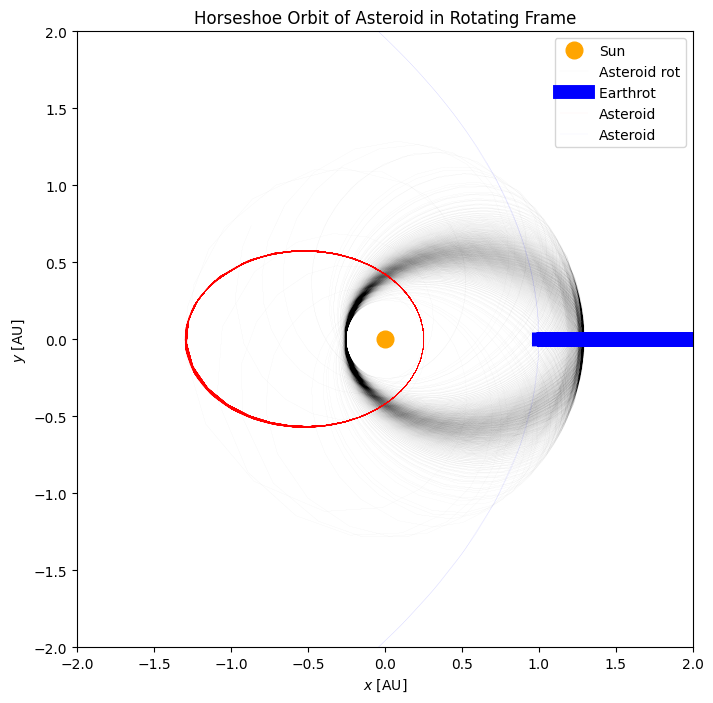

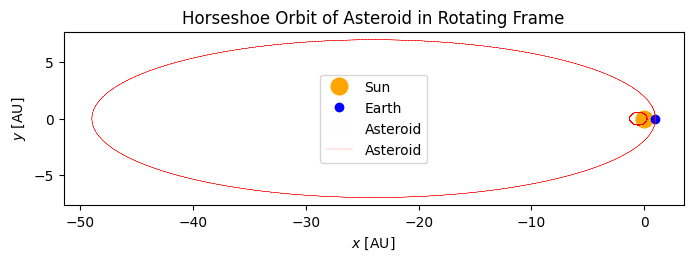

In [19]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')  # Sun at the origin
#ax.scatter(ast_x_rot, ast_y_rot, label='Asteroid rot', s=0.1)
ax.plot(ast_x_rot, ast_y_rot, label='Asteroid rot', linewidth = 0.01, color = 'black')

ax.plot(earth_x_rot, earth_y_rot, label='Earthrot ', linewidth = 10, color='blue')
#ax.plot(earth_x, earth_y, label='Earth', linestyle='--', color='blue')

ax.plot( ast_x, ast_y , label='Asteroid', linestyle='--', color='red', linewidth = 0.02)
ax.plot( earth_x, earth_y , label='Asteroid', linestyle='--', color='blue', linewidth = 0.02)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
ax.legend()
plt.title('Horseshoe Orbit of Asteroid in Rotating Frame')
#plt.show()

# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')  # Sun at the origin
ax.plot(1, 0, 'o', color='blue', label='Earth')  # Earth appears stationary at (1, 0)
ax.plot( ast_x, ast_y , label='Asteroid', linestyle='--', color='red', linewidth = 0.02)
ax.plot(earth_x, earth_y, label='Asteroid', linestyle='--', color='red', linewidth = 0.2)


ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
ax.legend()
plt.title('Horseshoe Orbit of Asteroid in Rotating Frame')
plt.show()

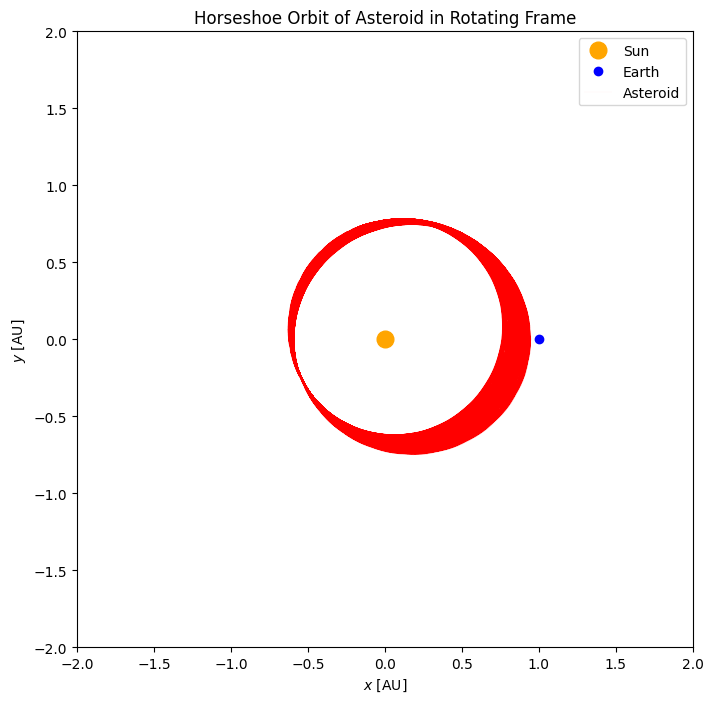

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=12, color='orange', zorder=0, label='Sun')  # Sun at the origin
ax.plot(1, 0, 'o', color='blue', label='Earth')  # Earth appears stationary at (1, 0)
ax.plot( ast_x, ast_y , label='Asteroid', linestyle='--', color='red', linewidth = 0.02)
#ax.plot(earth_x, earth_y, label='Asteroid', linestyle='--', color='red', linewidth = 0.02)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
ax.legend()
plt.title('Horseshoe Orbit of Asteroid in Rotating Frame')
plt.show()